In [1]:
import numpy as np
import pandas as pd 
import cv2 as cv
from matplotlib import pyplot as plt

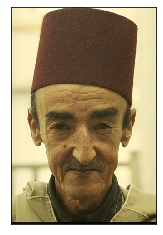

In [40]:
img=cv.imread('189080.jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img) 
plt.xticks([])
plt.yticks([])
plt.grid(False)

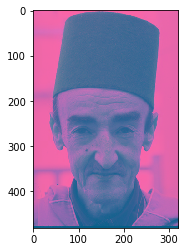

In [41]:
pic=cv.cvtColor(img,cv.COLOR_RGB2LUV)
plt.imshow(pic) 

In [42]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(154401, 3)

In [66]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

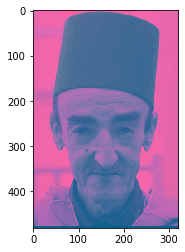

In [67]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic/255)

In [69]:
pic.shape

(481, 321, 3)

In [70]:
cluster_pic.shape

(481, 321, 3)

In [71]:
np.linalg.norm(pic-cluster_pic)

1049.3775290862545

In [76]:
clusterssize=[2,3,5,8,10,15,20,30,40,50]
error=[]

In [77]:
for i in clusterssize:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(pic_n)
    pic2show = kmeans.cluster_centers_[kmeans.labels_]
    cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
    error.append(np.linalg.norm(pic-cluster_pic))
    print(i)

2
3
5
8
10
15
20
30
40
50


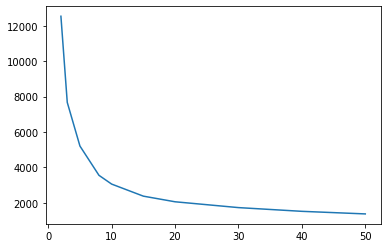

In [78]:
plt.plot(clusterssize,error)

In [79]:
error

[12535.66756270402,
 7668.630612937579,
 5203.189412992032,
 3548.9135301347496,
 3053.9380879224987,
 2372.7799561562665,
 2054.5443211562897,
 1725.5450601749558,
 1515.169842176784,
 1369.0041229008086]